### Importing the Relevant Packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

### Importing the Data and Pre-processing

In [4]:
raw_csv_data = pd.read_csv('013 IndexE8.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [5]:
#Deleting unwanted columns
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [6]:
#Splitting Data into train and test
size = int(len(df_comp)*0.8)
df, df_test = df_comp[size:], df_comp[:size]

In [8]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

### Creating Returns

In [9]:
df['returns'] = df.market_value.pct_change(1) * 100

In [11]:
#ADFULLER TEST
sts.adfuller(df.returns[1:])

(-19.144530699208023,
 0.0,
 3,
 1251,
 {'1%': -3.4355880246374304,
  '5%': -2.8638531175675896,
  '10%': -2.568001531098063},
 3088.6645857988337)

### ACF for Returns

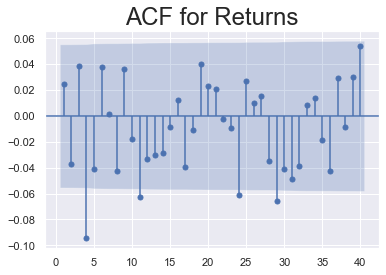

In [15]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for Returns', Size=24)
plt.show()

### Moving Average MA(1)

In [16]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
print(results_ret_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(0, 1)   Log Likelihood               -1572.688
Method:                       css-mle   S.D. of innovations              0.847
Date:                Wed, 17 Mar 2021   AIC                           3151.376
Time:                        11:16:11   BIC                           3166.781
Sample:                    04-09-2013   HQIC                          3157.166
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.025      0.798      0.425      -0.029       0.068
ma.L1.returns     0.0266      0.029      0.903      0.366      -0.031       0.084
                                    Root

In [17]:
#LLR Test
def LLR_test(mod_1,mod_2, DF=1):
    #mod_1, mod_2: modelwe want to compare
    #Degree of Freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(2)
    return p

### Higher Lag

In [19]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(0, 2)   Log Likelihood               -1571.469
Method:                       css-mle   S.D. of innovations              0.846
Date:                Wed, 17 Mar 2021   AIC                           3150.938
Time:                        11:21:27   BIC                           3171.478
Sample:                    04-09-2013   HQIC                          3158.658
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0195      0.023      0.832      0.405      -0.026       0.065
ma.L1.returns     0.0296      0.028      1.042      0.297      -0.026       0.085
ma.L2.returns    -0.0487      0.031     

In [20]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(0, 3)   Log Likelihood               -1570.495
Method:                       css-mle   S.D. of innovations              0.846
Date:                Wed, 17 Mar 2021   AIC                           3150.990
Time:                        11:22:22   BIC                           3176.665
Sample:                    04-09-2013   HQIC                          3160.640
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.025      0.797      0.425      -0.029       0.068
ma.L1.returns     0.0346      0.028      1.212      0.225      -0.021       0.090
ma.L2.returns    -0.0436      0.031     

In [21]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(0, 4)   Log Likelihood               -1564.769
Method:                       css-mle   S.D. of innovations              0.842
Date:                Wed, 17 Mar 2021   AIC                           3141.537
Time:                        11:23:12   BIC                           3172.347
Sample:                    04-09-2013   HQIC                          3153.117
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.022      0.889      0.374      -0.024       0.063
ma.L1.returns     0.0239      0.028      0.851      0.395      -0.031       0.079
ma.L2.returns    -0.0336      0.028     

In [23]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_4, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 1255
Model:                     ARMA(0, 8)   Log Likelihood               -1561.992
Method:                       css-mle   S.D. of innovations              0.840
Date:                Wed, 17 Mar 2021   AIC                           3143.985
Time:                        12:21:19   BIC                           3195.334
Sample:                    04-09-2013   HQIC                          3163.285
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0196      0.020      0.970      0.332      -0.020       0.059
ma.L1.returns     0.0307      0.028      1.086      0.278      -0.025       0.086
ma.L2.returns    -0.0387      0.028     

### Residuals for Returns

In [24]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[:1]

In [29]:
round(df.res_ret_ma_8.mean(),3)

0.558

In [31]:
round(df.res_ret_ma_8.var(),3)

nan

In [33]:
round(sqrt(df.res_ret_ma_8.var()),3)

nan

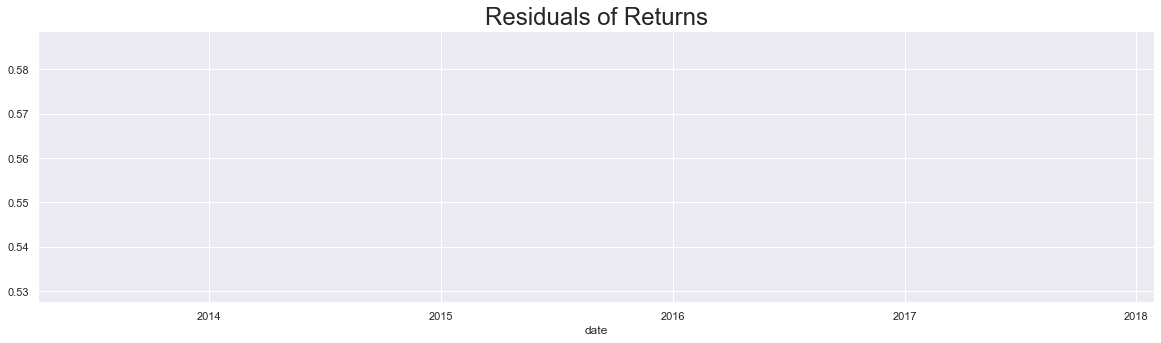

In [34]:
df.res_ret_ma_8.plot(figsize=(20,5))
plt.title('Residuals of Returns', size=24)
plt.show()

In [38]:
df.isnull().sum()

market_value       0
returns            1
res_ret_ma_8    1255
dtype: int64

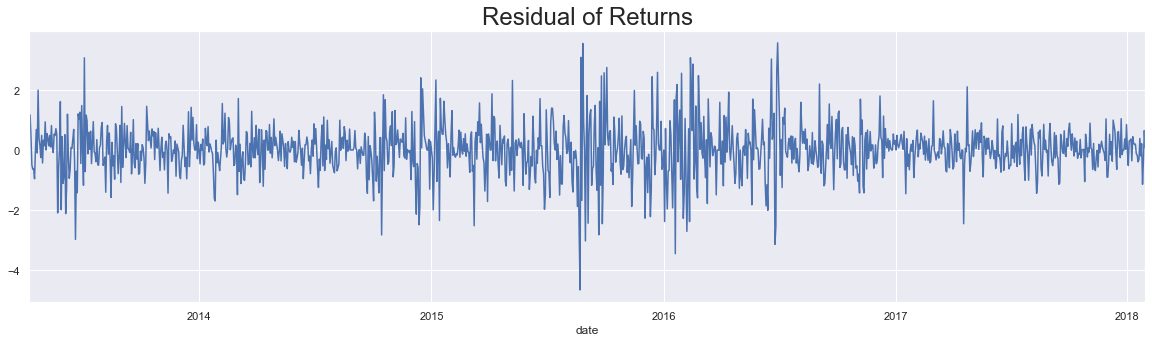

In [39]:
df.returns[1:].plot(figsize=(20,5))
plt.title('Residual of Returns', size=24)
plt.show()